<a href="https://colab.research.google.com/github/Raj-Banerjee/ML-old_car_price_prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_dataset= pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
car_dataset.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
car_dataset['selling_price'] = car_dataset['selling_price']/100000

Getting the details about the data

In [ ]:
car_dataset.shape

(4340, 8)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4340 non-null   float64
 3   km_driven      4340 non-null   int64  
 4   fuel           4340 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 271.4+ KB


checking for the number of missing values

In [ ]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#  Check for the differnt cateogories of the data
print(car_dataset.fuel.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())
print(car_dataset.seller_type.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64




---
<br>
<h4> Encoding of the cateogorical data :</h4> <br>
This means that the data is now converted into the numeric value for each part i:e transmission or fuel type into numbers

In [ ]:
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,0.60,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,1.35,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,6.00,100000,1,0,0,0
3,Datsun RediGO T Option,2017,2.50,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,4.50,141000,1,0,0,1


Spliting the Dataset into training and target

In [ ]:
x = car_dataset.drop(['name','selling_price'],axis=1)
y = car_dataset['selling_price']

In [ ]:
print(y)

0       0.60000
1       1.35000
2       6.00000
3       2.50000
4       4.50000
         ...   
4335    4.09999
4336    4.09999
4337    1.10000
4338    8.65000
4339    2.25000
Name: selling_price, Length: 4340, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Model Training
1. Linear Regression Model

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evvaluation

In [ ]:
# Prediction of Training Data
training_data_prediction = lin_reg_model.predict(x_train)

In [ ]:
# R Square Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R Square Error: ",error_score)

R Square Error:  0.42832288947625463


Visualising the Actual prices and the predicted prices

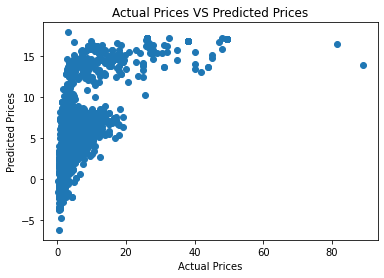

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

### Now Calculate for the Test Data

In [ ]:
# Prediction of Testing Data
testing_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
# R Square error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print("R Square Error For Test Data: ",error_score)

R Square Error For Test Data:  0.4918005460679514


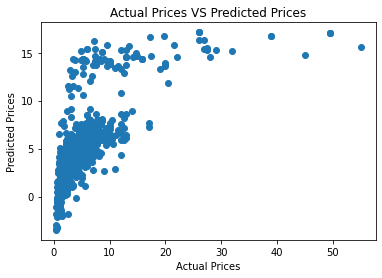

In [ ]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

# Now By Lasso Regression

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Model Evvaluation

In [ ]:
# Prediction of Training Data
training_data_prediction = lass_reg_model.predict(x_train)

In [ ]:
# R Square Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R Square Error: ",error_score)

R Square Error:  0.16762979724555904


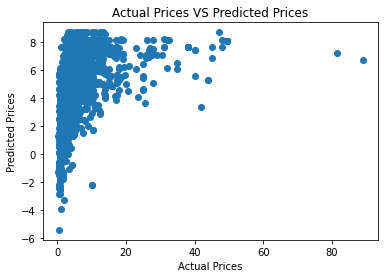

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [ ]:
# Prediction of Testing Data
testing_data_prediction = lass_reg_model.predict(x_test)

In [ ]:
# R Square error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print("R Square Error For Test Data: ",error_score)

R Square Error For Test Data:  0.17773832837050252


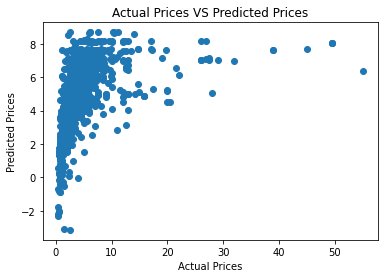

In [ ]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

Printing the Output

In [ ]:
print(lin_reg_model.coef_)
print(lin_reg_model.intercept_)

[ 3.99312030e-01 -5.88804365e-06  2.10230588e+00  9.33887102e-01
  8.65301306e+00 -1.32434698e-01]
-800.6258923790391


# Sample Output 

The Output will be in format of Year, KM Driven, Fuel, Seller Type,  Transmission, Owner

In [ ]:
cost = (lin_reg_model.predict([[2014,100000,0,0,0,1]]))
print(cost*100000)

[286729.78018046]
